In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import sys
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from ROI_tsne_funcs import plot_rois_center_tsne
import ROI_actions
from ROI_actions import *
# Getting my modules
sys.path.append('/home/jonathak/VisualEncoder/Analysis/Brain_maps')
from NIPS_utils import get_hemisphere_indices, get_roi_indices, get_roi_indices_per_hemisphere


# Setting up GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Appending Roman's path
sys.path.append('/home/romanb/PycharmProjects/BrainVisualReconst/')

In [2]:
# Loading the model
encoder = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')
model = torch.load('/home/jonathak/VisualEncoder/Voxels_Prediction/model_ch128.pth').eval().cuda()

# Testing voxel embeddings
voxel_embeddings = model.voxel_embed # Has shape [315997, 256]

# Getting subject 1 indices

subject = 1

lh_start, lh_end = get_hemisphere_indices(subject, 'lh')
rh_start, rh_end = get_hemisphere_indices(subject, 'rh')    
sub_indices = np.arange(lh_start, rh_end)

voxel_embeddings = voxel_embeddings[sub_indices]


Using cache found in /home/matanyaw/.cache/torch/hub/facebookresearch_dinov2_main
/home/matanyaw/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/matanyaw/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/matanyaw/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [3]:
subject = 1

# Getting ROI indices

ROIs_bodies = ['EBA', 'FBA-1', 'FBA-2', 'mTL-bodies']
ROIs_faces = ['OFA', 'FFA-1', 'FFA-2', 'mTL-faces', 'aTL-faces']
ROIs_places = ['OPA', 'PPA', 'RSC']
ROIs_words = ['OWFA', 'VWFA-1', 'VWFA-2', 'mfs-words', 'mTL-words']
ROIs_visual = ['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4']

ROI_names = ROIs_bodies + ROIs_faces + ROIs_places + ROIs_words + ROIs_visual

predefined_ROI_indices = {}

# Creating a dictionary of ROI indices (iterating over copy because we remove ROIs that don't exist)
for ROI in ROI_names.copy():
    
    roi_indices = get_roi_indices(subject, ROI)
    
    if roi_indices is None:
        ROI_names.remove(ROI)
    else:
        predefined_ROI_indices[ROI] = roi_indices
        # print(ROI, roi_indices.shape)
# predefined_ROIless_indeices = summary_roi_coverage(predefined_ROI_indices, sub_indices)


ROI 'mTL-bodies' not found for subject 1
ROI 'mTL-faces' not found for subject 1
ROI 'aTL-faces' not found for subject 1
ROI 'mTL-words' not found for subject 1


In [4]:
topk_config = ROI_actions.InferRoiCoverageConfig(voxel_embeddings=voxel_embeddings, 
                                                 predefined_ROI_indices_dict=predefined_ROI_indices,
                                                 center_method='mean', 
                                                 metric='euclidean', 
                                                 discrimination_method='nearest_voxels')
inferred_topk_roi_indices_auto = topk_config.infer_roi_coverage()
topk_config.infer_roiless_indices(sub_indices)

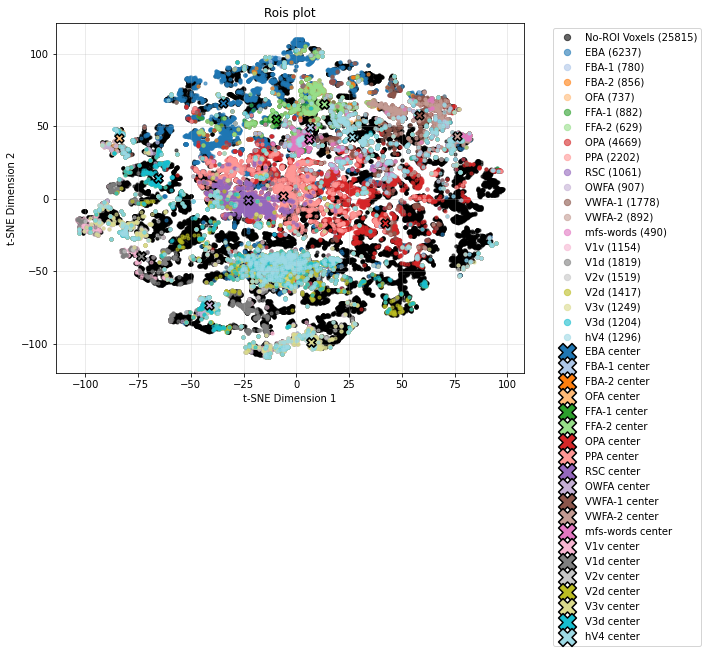

In [7]:
voxel_embeddings_tsne_topk, roi_center_embeddings_tsne_topk = plot_rois_center_tsne(topk_config)

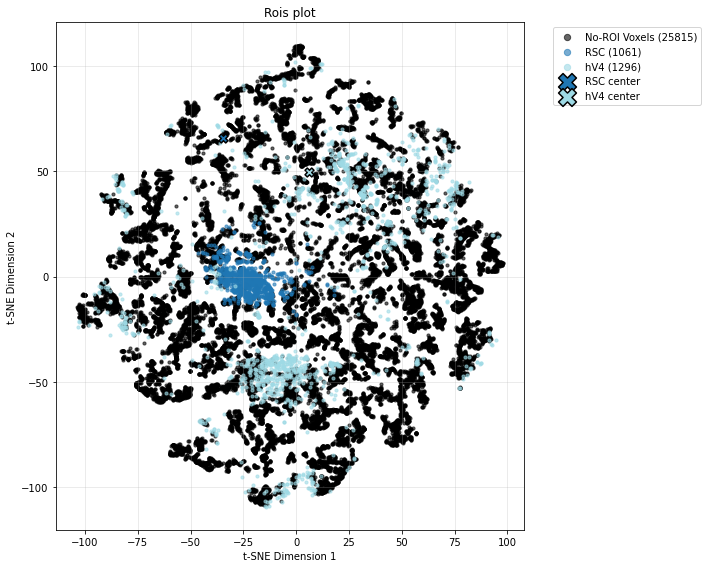

In [15]:
_ = plot_rois_center_tsne(topk_config,
                          voxel_embeddings_tsne=voxel_embeddings_tsne_topk,
                          roi_center_embeddings_tsne=roi_center_embeddings_tsne_topk,
                           ROIs_to_plot=['RSC','hV4',  ])

In [18]:
meanshift_config = ROI_actions.InferRoiCoverageConfig(voxel_embeddings=voxel_embeddings, 
                                                 predefined_ROI_indices_dict=predefined_ROI_indices,
                                                 center_method='meanshift', 
                                                 metric='euclidean', 
                                                 discrimination_method='nearest_voxels')
meanshift_roi_coverage = meanshift_config.infer_roi_coverage()
meanshift_config.infer_roiless_indices(sub_indices)

(6237,)
(780,)
(856,)
(737,)
(882,)
(629,)
(4669,)
(2202,)
(1061,)
(907,)
(1778,)
(892,)
(490,)
(1154,)
(1819,)
(1519,)
(1417,)
(1249,)
(1204,)
(1296,)


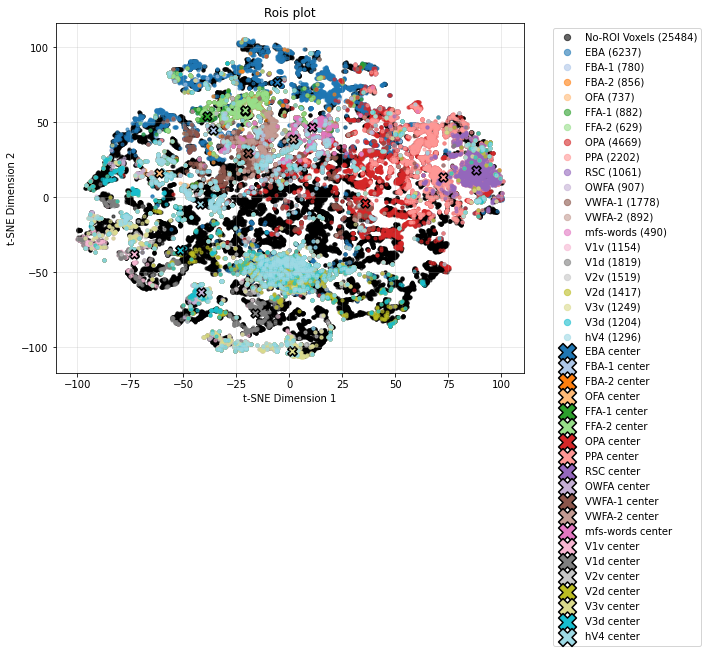

In [17]:
voxel_embeddings_tsne_meanshift, roi_center_embeddings_tsne_meanshift = plot_rois_center_tsne(meanshift_config)